# 1) Εισάγετε τις βιβλιοθήκες σας

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

# 2) Διαβάστε το αρχείο σας και τις πρώτες πέντε σειρές

In [7]:
df = pd.read_csv("occupational.csv")

In [8]:
df.head()

,collection,collection.label,ref_area,ref_area.label,source,source.label,indicator,indicator.label,sex,sex.label,...,obs_value,obs_status,obs_status.label,note_classif,note_classif.label,note_indicator,note_indicator.label,note_source,note_source.label,Unnamed: 30
0,YI,Yearly indicators,AND,Andorra,EA:98,AND - OE - Estimations du département des stat...,INJ_DAYS_SEX_MIG_NB,Days lost due to cases of occupational injury ...,SEX_T,Sex: Total,...,681.0,NaN,NaN,NaN,NaN,T13:150_T14:153_I2:469,Coverage of occupational injuries: Compensated...,NaN,NaN,NaN
1,YI,Yearly indicators,AND,Andorra,EA:98,AND - OE - Estimations du département des stat...,INJ_DAYS_SEX_MIG_NB,Days lost due to cases of occupational injury ...,SEX_M,Sex: Male,...,369.0,NaN,NaN,NaN,NaN,T13:150_T14:153_I2:469,Coverage of occupational injuries: Compensated...,NaN,NaN,NaN
2,YI,Yearly indicators,AND,Andorra,EA:98,AND - OE - Estimations du département des stat...,INJ_DAYS_SEX_MIG_NB,Days lost due to cases of occupational injury ...,SEX_F,Sex: Female,...,312.0,NaN,NaN,NaN,NaN,T13:150_T14:153_I2:469,Coverage of occupational injuries: Compensated...,NaN,NaN,NaN
3,YI,Yearly indicators,ARG,Argentina,FA:865,ARG - ADM-IR - Registros de seguros,INJ_DAYS_SEX_MIG_NB,Days lost due to cases of occupational injury ...,SEX_T,Sex: Total,...,12022892.0,NaN,NaN,NaN,NaN,T13:149,Coverage of occupational injuries: Reported in...,S3:26,Data reference period: Noncalendar year,NaN
4,YI,Yearly indicators,ARG,Argentina,FA:865,ARG - ADM-IR - Registros de seguros,INJ_DAYS_SEX_MIG_NB,Days lost due to cases of occupational injury ...,SEX_T,Sex: Total,...,14765377.0,NaN,NaN,NaN,NaN,T13:149,Coverage of occupational injuries: Reported in...,S3:26,Data reference period: Noncalendar year,NaN


# 3) Ποιες είναι οι στήλες σας και τι μπορείτε να συμπεράνετε αρχικά;

In [9]:
df.columns

Index(['collection', 'collection.label', 'ref_area', 'ref_area.label',
       'source', 'source.label', 'indicator', 'indicator.label', 'sex',
       'sex.label', 'classif1', 'classif1.label', 'classif2', 'classif2.label',
       'classif3', 'classif3.label', 'classif4', 'classif4.label', 'classif5',
       'classif5.label', 'time', 'obs_value', 'obs_status', 'obs_status.label',
       'note_classif', 'note_classif.label', 'note_indicator',
       'note_indicator.label', 'note_source', 'note_source.label',
       'Unnamed: 30'],
      dtype='object')

# 4) Κρατήστε μόνο τις στήλες εκείνες που θα σας δώσουν στοιχεία για τη χώρα, το φύλο, το έτος και τις χαμένες ώρες δουλειάς

In [11]:
df2 = df.iloc[:, [3, 8, 20, 21]]

In [12]:
df2.head()

,ref_area.label,sex,time,obs_value
0,Andorra,SEX_T,2015,681.0
1,Andorra,SEX_M,2015,369.0
2,Andorra,SEX_F,2015,312.0
3,Argentina,SEX_T,2005,12022892.0
4,Argentina,SEX_T,2006,14765377.0


# 5) Ελέγξτε τον τύπο των δεδομένων κάθε στήλης που έχετε

In [13]:
df2.dtypes

ref_area.label     object
sex                object
time                int64
obs_value         float64
dtype: object

# 6) Καθαρίστε τη στήλη για το φύλο ώστε να δείχνει μόνο αυτό και τίποτα άλλο!

In [15]:
df2['sex'] = df2['sex'].map(lambda x: x.lstrip('SEX_'))

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [16]:
df2.head()

,ref_area.label,sex,time,obs_value
0,Andorra,T,2015,681.0
1,Andorra,M,2015,369.0
2,Andorra,F,2015,312.0
3,Argentina,T,2005,12022892.0
4,Argentina,T,2006,14765377.0


# 7) Κρατήστε μόνο ένα df με τις περιπτώσεις χαμένων ωρών λόγω τραυματισμών γυναικών 

In [17]:
df_women = df2[(df2['sex'] == 'F')]

In [18]:
df_women

,ref_area.label,sex,time,obs_value
2,Andorra,F,2015,312.0
10,Argentina,F,2011,2965569.0
13,Argentina,F,2012,2940849.0
16,Argentina,F,2014,3245548.0
19,Argentina,F,2015,3023893.0
22,Argentina,F,2016,2735125.0
29,Argentina,F,2017,2538602.0
30,Argentina,F,2017,88881.0
31,Argentina,F,2017,2449721.0
39,Austria,F,2005,241457.0


In [19]:
df_women.groupby('ref_area.label')['obs_value'].sum()

ref_area.label
Algeria                                343502.0
Andorra                                   312.0
Argentina                            19988188.0
Austria                               4153545.0
Belarus                                280676.0
Belgium                               3724088.0
Belize                                  36570.0
Bulgaria                               822826.0
Chile                                 3123492.0
Croatia                               1111086.0
Cyprus                                 110824.0
Czech Republic                        7528181.0
Denmark                               4864841.0
Dominican Republic                      85648.0
Egypt                                  131772.0
Estonia                               1304757.0
Finland                               4677674.0
France                              136116818.0
French Guiana                               9.0
Greece                                 387100.0
Guadeloupe               

# 8) Απεικονίστε τις 10 πρώτες χώρες σε συνολικές χαμένες ώρες λόγω τραυματισμών γυναικών στην εργασία 

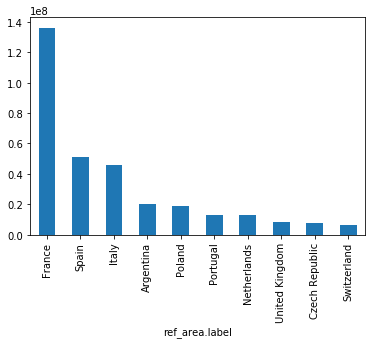

In [30]:
df_women.groupby('ref_area.label')['obs_value'].sum().sort_values(ascending=False).head(10).plot(kind='bar')